In [57]:
# all params...

include("MDPModelFunctions2.jl")


plot_over_time_exp2 (generic function with 1 method)

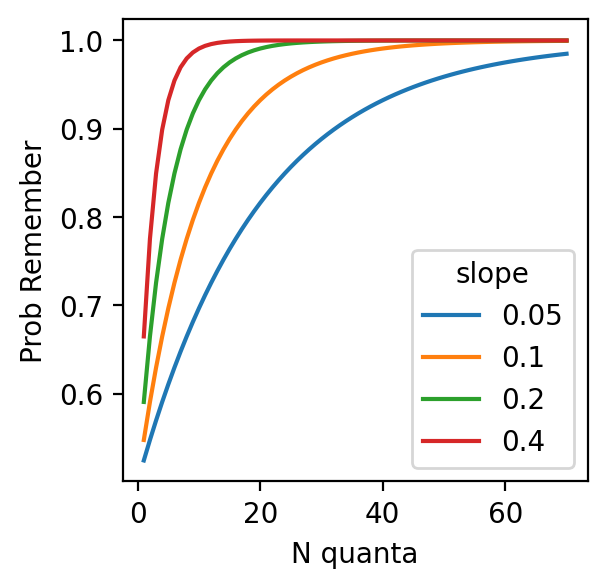

Python: Text(48.000000000000014, 0.5, 'Prob Remember')

In [96]:
mem_slopes = [.05, .1, .2, .4]
fig,ax = subplots(1, figsize = (3,3),dpi = 200, sharey = true)
q_vals = 1:70
[ax.plot(q_vals, prob_remember(q_vals; mem_slope = m), label = m) for m in mem_slopes]
ax.legend(title = "slope")
ax.set_xlabel("N quanta")
ax.set_ylabel("Prob Remember")

In [58]:
using PythonPlot

mem_slope: 0.05, epsilon: 0.95, n_quanta: 20
mem_slope: 0.05, epsilon: 0.95, n_quanta: 40
mem_slope: 0.1, epsilon: 0.95, n_quanta: 20
mem_slope: 0.1, epsilon: 0.95, n_quanta: 40
mem_slope: 0.2, epsilon: 0.95, n_quanta: 20
mem_slope: 0.2, epsilon: 0.95, n_quanta: 40
mem_slope: 0.4, epsilon: 0.95, n_quanta: 20
mem_slope: 0.4, epsilon: 0.95, n_quanta: 40


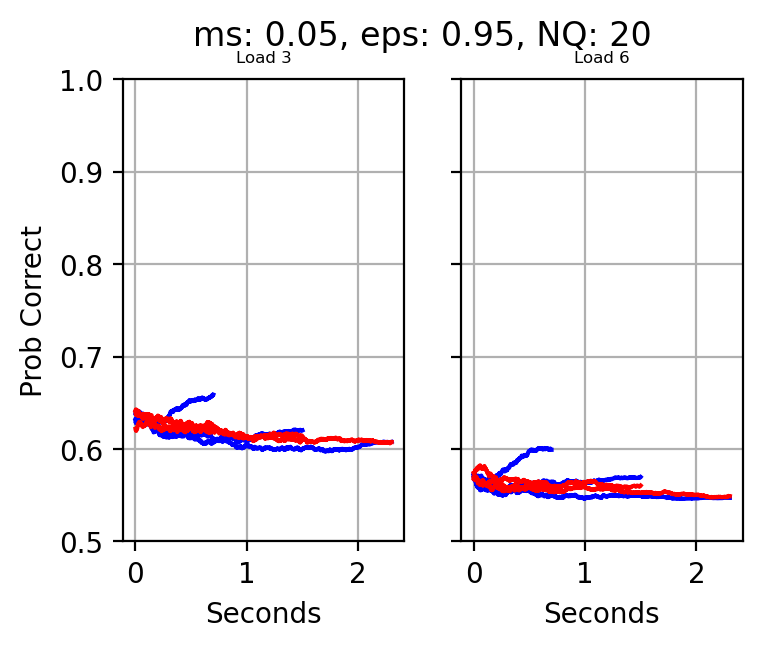

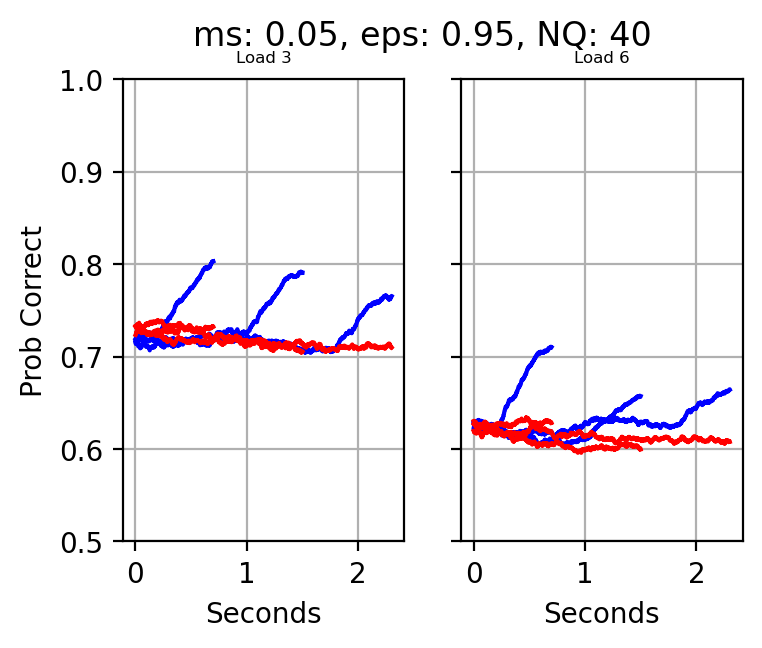

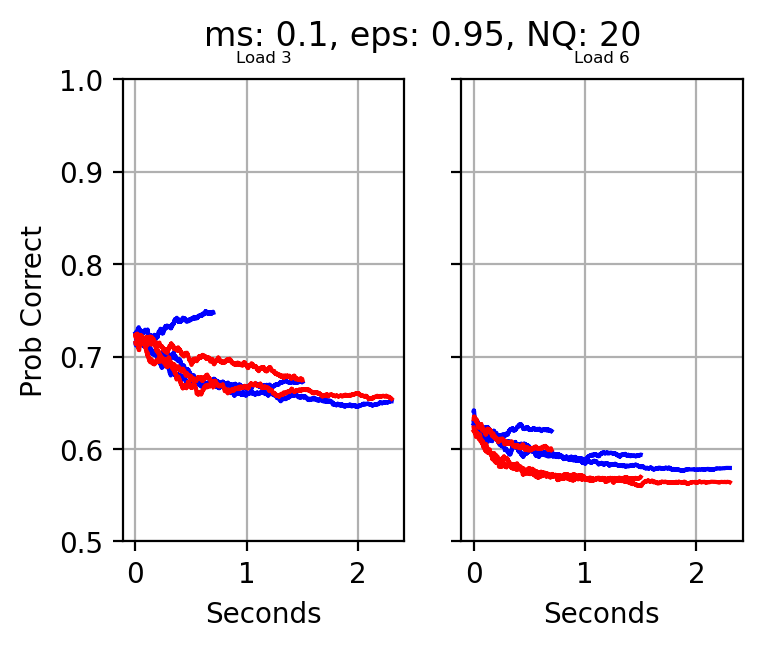

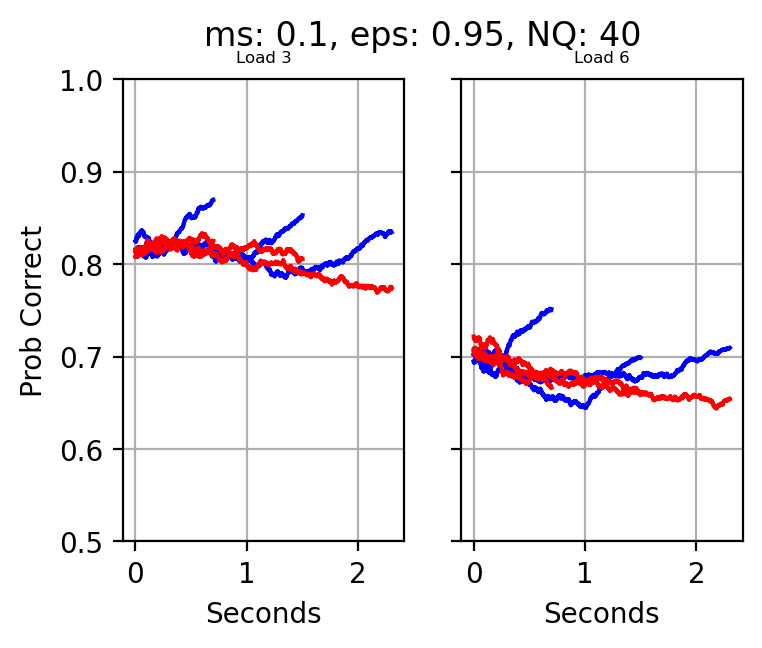

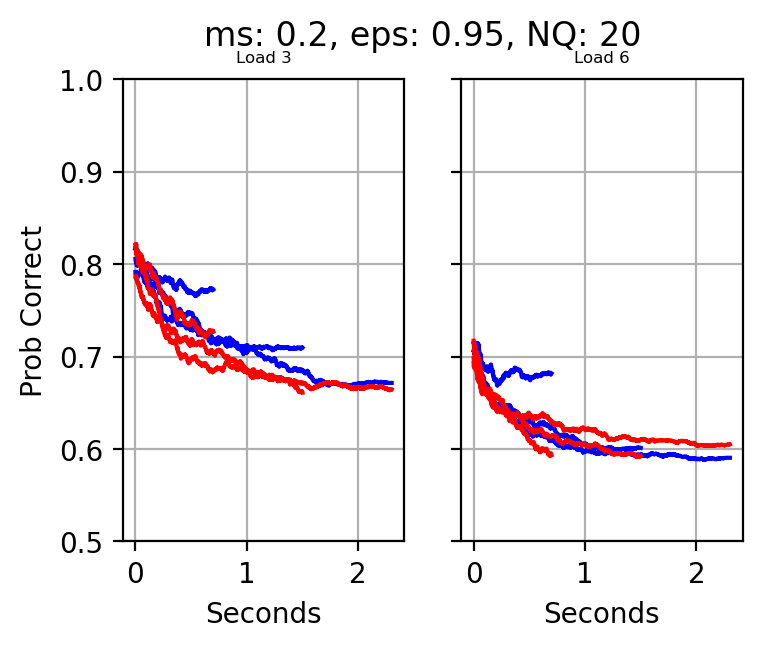

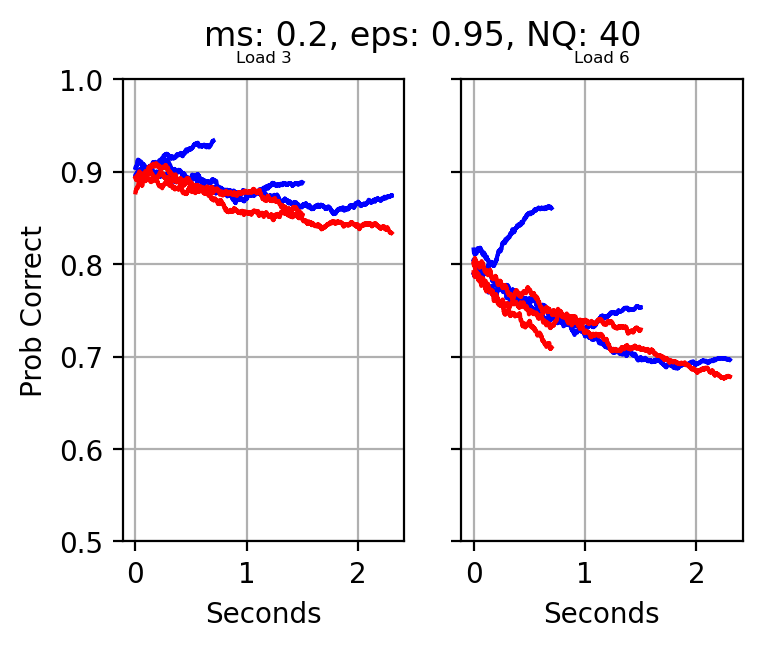

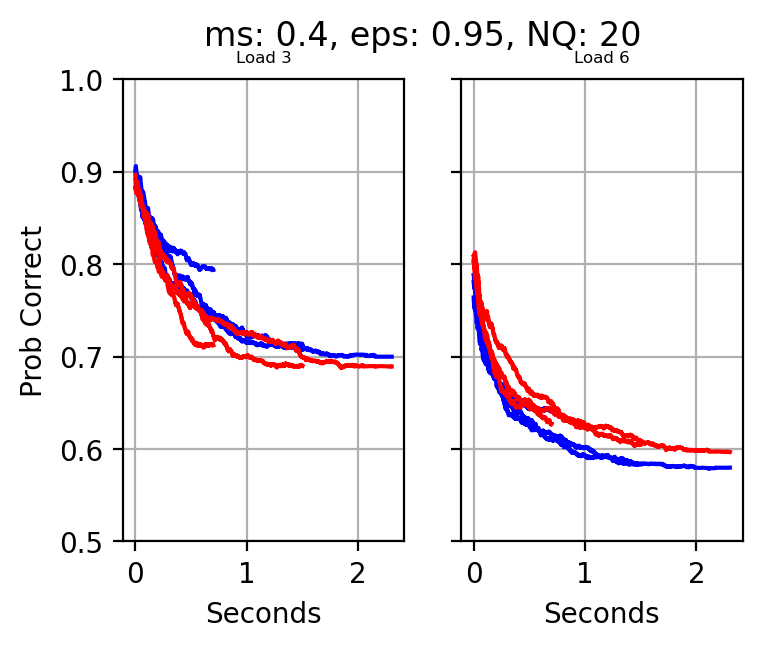

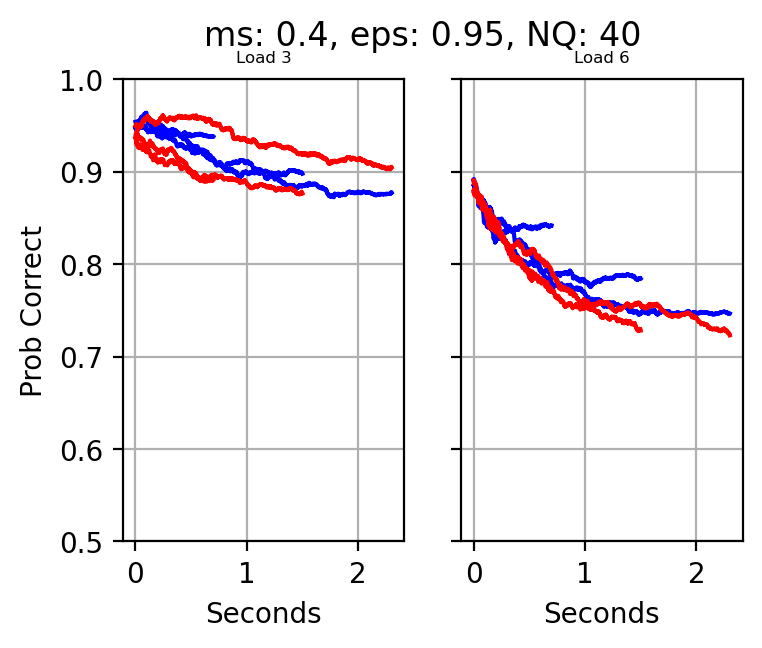

In [97]:
epsilon_vals = [.95]
N_Quanta_vals = [20, 40]
NT_per_Second = 800
mem_slopes = [.05, .1, .2, .4]

for mem_slope in mem_slopes
    for epsilon in epsilon_vals
        for N_Quanta in N_Quanta_vals
            
            println("mem_slope: $(mem_slope), epsilon: $(epsilon), n_quanta: $(N_Quanta)")
            
            
        
            (p_IM_neutral, p_IM_retro, p_VSTM_neutral, p_VSTM_retro, p_Long_VSTM_neutral, p_Long_VSTM_retro) = sim_exp3(epsilon, N_Quanta, NT_per_Second; mem_slope = mem_slope, return_last_only=false)

            fig,ax = subplots(1,2, figsize = (4,3),dpi = 200, sharey = true)

            titles = ["Load 3", "Load 6"]
            for obj_idx = 1:2

                ax[obj_idx-1].plot((1:length(p_IM_retro[obj_idx,:]))./ NT_per_Second, p_IM_retro[obj_idx,:], 'b')
                ax[obj_idx-1].plot((1:length(p_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_VSTM_retro[obj_idx,:], 'b')
                ax[obj_idx-1].plot((1:length(p_Long_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_retro[obj_idx,:], 'b', label = "Retro")

                ax[obj_idx-1].plot((1:length(p_IM_neutral[obj_idx,:]))./ NT_per_Second, p_IM_neutral[obj_idx,:], 'r')
                ax[obj_idx-1].plot((1:length(p_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_VSTM_neutral[obj_idx,:], 'r')
                ax[obj_idx-1].plot((1:length(p_Long_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_neutral[obj_idx,:], 'r', label = "Neutral")



                ax[obj_idx-1].set_title(titles[obj_idx], fontsize = 6)
                ax[obj_idx-1].set_xlabel("Seconds")
                ax[obj_idx-1].set_ylim(.5,1)
                ax[obj_idx-1].grid()

            end

            ax[0].set_ylabel("Prob Correct")
            fig.suptitle("ms: $(mem_slope), eps: $(epsilon), NQ: $(N_Quanta)")
        
        end
    end
end

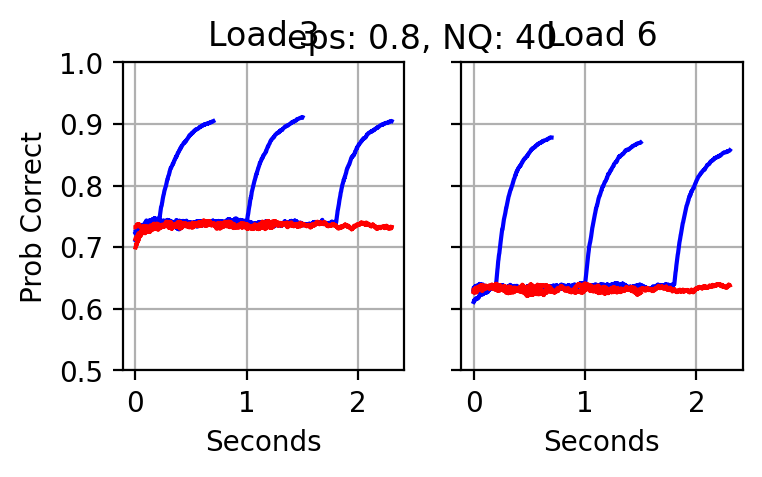

Python: Text(0.5, 0.98, 'eps: 0.8, NQ: 40')

In [70]:
fig,ax = subplots(1,2, figsize = (4,2),dpi = 200, sharey = true)

titles = ["Load 3", "Load 6"]
for obj_idx = 1:2
    
    ax[obj_idx-1].plot((1:length(p_IM_retro[obj_idx,:]))./ NT_per_Second, p_IM_retro[obj_idx,:], 'b')
    ax[obj_idx-1].plot((1:length(p_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_VSTM_retro[obj_idx,:], 'b')
    ax[obj_idx-1].plot((1:length(p_Long_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_retro[obj_idx,:], 'b', label = "Retro")

    ax[obj_idx-1].plot((1:length(p_IM_neutral[obj_idx,:]))./ NT_per_Second, p_IM_neutral[obj_idx,:], 'r')
    ax[obj_idx-1].plot((1:length(p_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_VSTM_neutral[obj_idx,:], 'r')
    ax[obj_idx-1].plot((1:length(p_Long_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_neutral[obj_idx,:], 'r', label = "Neutral")


    
    ax[obj_idx-1].set_title(titles[obj_idx])
    ax[obj_idx-1].set_xlabel("Seconds")
    ax[obj_idx-1].set_ylim(.5,1)
    ax[obj_idx-1].grid()
    
end

ax[0].set_ylabel("Prob Correct")
fig.suptitle("eps: $(epsilon), NQ: $(N_Quanta)")

In [12]:
size(p_IM_Neutral)

LoadError: UndefVarError: `p_IM_Neutral` not defined